Bộ dữ liệu: Tệp CSV được nhập và chứa các cột như Hydraulic_Pressure(bar), Coolant_Pressure(bar), và Downtime. Bộ dữ liệu này quản lý thông tin về áp suất thủy lực, áp suất chất làm mát, và trạng thái thời gian ngừng hoạt động của máy móc.

Mục tiêu: Xây dựng mô hình phân loại sử dụng SVM để dự đoán tình trạng Downtime (thời gian ngừng hoạt động) dựa trên các thông số áp suất.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [18]:
data = pd.read_csv('/content/MachineDowntime.csv')

Truyền dữ liệu vào

In [20]:
data = data.dropna()

Loại bỏ các dòng chứa giá trị thiếu để tránh sai số khi huấn luyện.

In [19]:
print(data.dtypes)

Date                                object
Machine_ID                          object
Assembly_Line_No                    object
Hydraulic_Pressure(bar)            float64
Coolant_Pressure(bar)              float64
Air_System_Pressure(bar)           float64
Coolant_Temperature                float64
Hydraulic_Oil_Temperature(?C)      float64
Spindle_Bearing_Temperature(?C)    float64
Spindle_Vibration(?m)              float64
Tool_Vibration(?m)                 float64
Spindle_Speed(RPM)                 float64
Voltage(volts)                     float64
Torque(Nm)                         float64
Cutting(kN)                        float64
Downtime                            object
dtype: object


Đọc dữ liệu từ tệp CSV và kiểm tra kiểu dữ liệu các cột.

In [52]:
X = data[['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)']]  # Chọn 2 đặc trưng
y = data['Downtime']

In [53]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

Chọn 2 cột đặc trưng để dự đoán và chuyển đổi Downtime từ dạng chuỗi thành số.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Chia dữ liệu thành 80% huấn luyện và 20% kiểm tra, chuẩn hóa để tăng hiệu quả mô hình.

In [56]:
model = SVC(kernel='rbf', probability=True)

In [57]:
model.fit(X_train, y_train)

SVC(probability=True)

In [58]:
y_pred = model.predict(X_test)

Dự đoán trên tập kiểm tra và in ra ma trận nhầm lẫn và báo cáo đánh giá.

In [59]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[217  20]
 [ 30 210]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       237
           1       0.91      0.88      0.89       240

    accuracy                           0.90       477
   macro avg       0.90      0.90      0.90       477
weighted avg       0.90      0.90      0.90       477



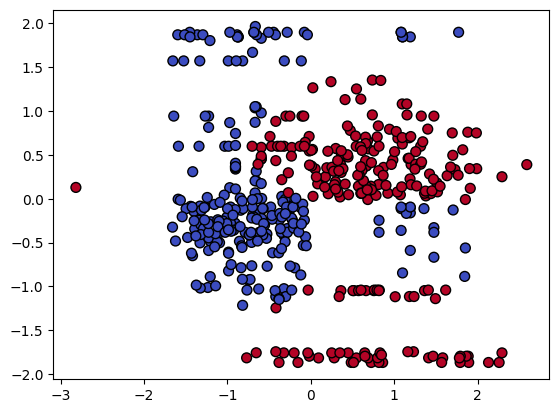

In [65]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k', s=50)


Hiển thị kết quả phân loại dữ liệu theo các nhãn.

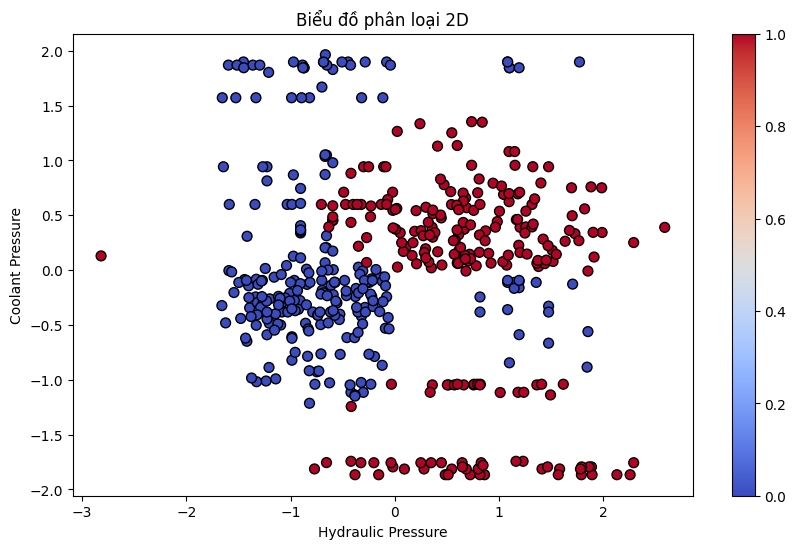

In [60]:
if X.shape[1] >= 2:  # Kiểm tra xem có đủ cột để vẽ biểu đồ 2D
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k', s=50)
    plt.title('Biểu đồ phân loại 2D')
    plt.xlabel('Hydraulic Pressure')
    plt.ylabel('Coolant Pressure')
    plt.colorbar()
    plt.show()

In [61]:
xx, yy = np.meshgrid(np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 100),
                     np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 100))

In [62]:
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_scaled = scaler.transform(grid_points)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [63]:
Z = model.decision_function(grid_points_scaled)
Z = Z.reshape(xx.shape)

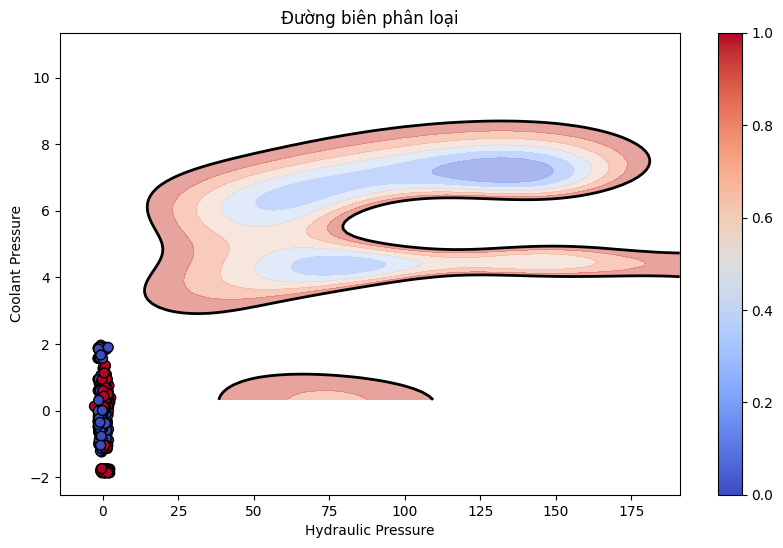

In [64]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap='coolwarm', alpha=0.5)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k', s=50)
plt.title('Đường biên phân loại')
plt.xlabel('Hydraulic Pressure')
plt.ylabel('Coolant Pressure')
plt.colorbar()
plt.show()

Vẽ các đường biên phân loại để trực quan hóa ranh giới của mô hình trong không gian 2D.